## Problem 1
<br>
<p>Replicate column 2 of Figure 3 in Erev & Roth (1998).<p>

In [92]:
import numpy as np

In [98]:
# initialize the game matrix
G_1 = np.array([[9,0],[0,1]]) # player 1's game matrix
G_2 = np.array([[0,1],[1,0]]) # player 2's game matrix

# initialize the strategy set
strategies = np.arange(2)

# initialize RL parameters
lam = .1
alpha = .1
delta = .95

# initialize values (a middle point of the max and min payoffs of the matrix) for player 1 and player 2 separately
values_1 = 1/(1-delta)*np.ones(2)*(G_1.min()+G_1.max())/2
values_2 = 1/(1-delta)*np.ones(2)*(G_2.min()+G_2.max())/2
G_1.max()

T = 800
results_11 = np.zeros(T)
results_12 = np.zeros(T)


for t in range(T):
    
    policy_1 = np.exp(lam*values_1)/np.exp(lam*values_1).sum()
    action_1 = np.random.choice(strategies, p=policy_1) 
    
    policy_2 = np.exp(lam*values_2)/np.exp(lam*values_2).sum()
    action_2 = np.random.choice(strategies, p=policy_2)
    
    r1 = G_1[action_1,action_2]
    r2 = G_2[action_2,action_1]
    
    values_1[action_1] = (1-alpha)*values_1[action_1] + alpha*(r1+delta*values_1.max())
    values_2[action_2] = (1-alpha)*values_2[action_2] + alpha*(r2+delta*values_2.max())
        
    results_11[t]=policy_1[0]
    results_12[t]=policy_2[0]

In [99]:
# initialize the game matrix
G_1 = np.array([[4,0],[0,1]]) # player 1's game matrix
G_2 = np.array([[0,1],[1,0]]) # player 2's game matrix

# initialize the strategy set
strategies = np.arange(2)

# initialize RL parameters
lam = .1
alpha = .1
delta = .95

# initialize values (a middle point of the max and min payoffs of the matrix) for player 1 and player 2 separately
values_1 = 1/(1-delta)*np.ones(2)*(G_1.min()+G_1.max())/2
values_2 = 1/(1-delta)*np.ones(2)*(G_2.min()+G_2.max())/2
G_1.max()

T = 800
results_21 = np.zeros(T)
results_22 = np.zeros(T)

for t in range(T):
    
    policy_1 = np.exp(lam*values_1)/np.exp(lam*values_1).sum()
    action_1 = np.random.choice(strategies, p=policy_1) 
    
    policy_2 = np.exp(lam*values_2)/np.exp(lam*values_2).sum()
    action_2 = np.random.choice(strategies, p=policy_2)
    
    r1 = G_1[action_1,action_2]
    r2 = G_2[action_2,action_1]
    
    values_1[action_1] = (1-alpha)*values_1[action_1] + alpha*(r1+delta*values_1.max())
    values_2[action_2] = (1-alpha)*values_2[action_2] + alpha*(r2+delta*values_2.max())
        
    results_21[t]=policy_1[0]
    results_22[t]=policy_2[0]

In [100]:
# initialize the game matrix
G_1 = np.array([[1,0],[0,1]]) # player 1's game matrix
G_2 = np.array([[0,1],[1,0]]) # player 2's game matrix

# initialize the strategy set
strategies = np.arange(2)

# initialize RL parameters
lam = .1
alpha = .1
delta = .95

# initialize values (a middle point of the max and min payoffs of the matrix) for player 1 and player 2 separately
values_1 = 1/(1-delta)*np.ones(2)*(G_1.min()+G_1.max())/2
values_2 = 1/(1-delta)*np.ones(2)*(G_2.min()+G_2.max())/2
G_1.max()

T = 800
results_31 = np.zeros(T)
results_32 = np.zeros(T)

for t in range(T):
    
    policy_1 = np.exp(lam*values_1)/np.exp(lam*values_1).sum()
    action_1 = np.random.choice(strategies, p=policy_1) 
    
    policy_2 = np.exp(lam*values_2)/np.exp(lam*values_2).sum()
    action_2 = np.random.choice(strategies, p=policy_2)
    
    r1 = G_1[action_1,action_2]
    r2 = G_2[action_2,action_1]
    
    values_1[action_1] = (1-alpha)*values_1[action_1] + alpha*(r1+delta*values_1.max())
    values_2[action_2] = (1-alpha)*values_2[action_2] + alpha*(r2+delta*values_2.max())
        
    results_31[t]=policy_1[0]
    results_32[t]=policy_2[0]

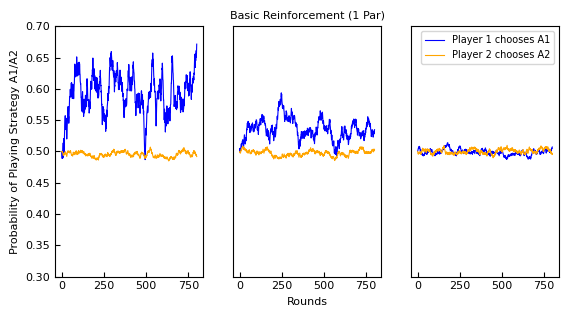

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [1*x for x in range(T)]
fig, axs = plt.subplots(1, 3, figsize=(6.5, 3.25))
axs[0].plot(x, results_11, 'blue', linewidth=0.8)
axs[0].plot(x, results_12, 'orange', linewidth=0.8)

for i in range(3):
    axs[i].set_ylim([0.3,0.7])
    axs[i].tick_params(axis='both', which='major', direction='in', labelsize=8)
axs[0].set_ylabel('Probability of Playing Strategy A1/A2', fontsize=8)
axs[1].plot(x, results_21, 'blue', linewidth=0.8)
axs[1].plot(x, results_22, 'orange', linewidth=0.8)
axs[1].set_xlabel('Rounds',fontsize=8)
axs[1].set_yticks([])
axs[2].plot(x, results_31, 'blue', linewidth=0.8, label='Player 1 chooses A1')
axs[2].plot(x, results_32, 'orange', linewidth=0.8, label='Player 2 chooses A2')
axs[2].set_yticks([])
axs[2].legend(fontsize=7)
axs[1].set_title('Basic Reinforcement (1 Par)', fontsize=8)
plt.savefig('ranfang_hw3_q1.png')
plt.show()